In [2]:
# k近邻算法
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [3]:
# 水仙花数据导入
iris = load_iris()    #中文名是安德森鸢尾花卉数据集
df = pd.DataFrame(iris.data, columns=iris.feature_names)    #是一个表格 
#加入一列为分类标签
df['label'] = iris.target# 表头字段就是key
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
# 选择其中的4个特征进行训练
# data = np.array(df.iloc[:100, [0, 1, -1]])


<AxesSubplot:>

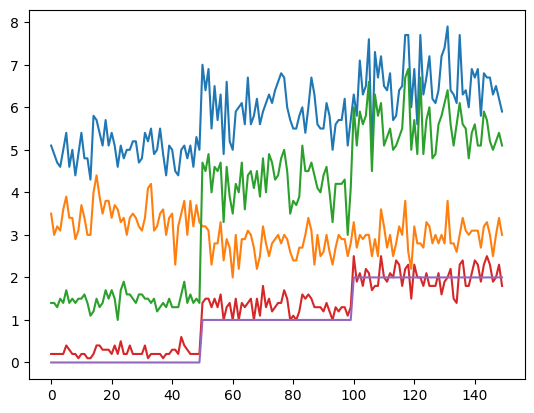

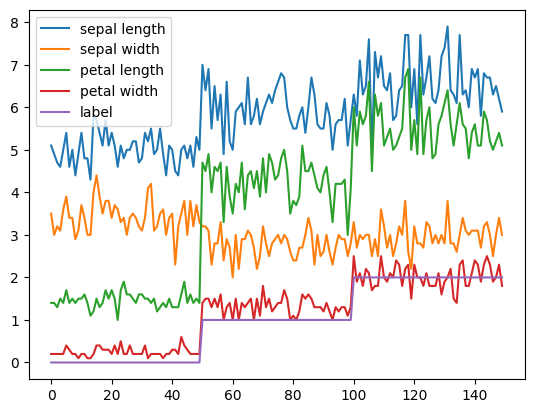

In [4]:
# 选择特征进行二分类
plt.plot(np.array(df.iloc[:,0]))
plt.plot(np.array(df.iloc[:,1]))
plt.plot(np.array(df.iloc[:,2]))
plt.plot(np.array(df.iloc[:,3]))
plt.plot(np.array(df.iloc[:,4]))

#简单方法
df.plot()

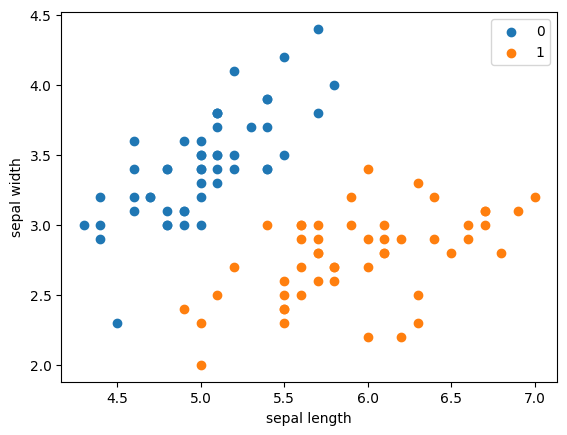

In [5]:
# 选择sepal length 、 petal length 和 petal width 个特征
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()


#取数据，并且分成训练和测试集合
data = np.array(df.iloc[:100, [0, 1, -1]])
#按行索引，取出第0列第1列和最后一列，即取出sepal长度、宽度和标签
X, y = data[:,:-1], data[:,-1]
#X为sepal length，sepal width y为标签 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# train_test_split函数用于将矩阵随机划分为训练子集和测试子集



In [6]:
# K近邻模型
# 模型思想：
# 此代码求欧式距离处有误，请仔细甄别
class KNN:
    def __init__(self, X_train, y_train, k=3, p=2):
        """
        parameter: k 邻近点个数
        parameter: p 距离度量
        决策方式：多数表决
        """
        self.k = k
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X):
        # 取出n个点，放入空的列表，列表中存放预测点与训练集点的距离及其对应标签
        # 取距离最小的k个点：先取前k个，然后遍历替换
        # knn_list存“距离”和“label”
        
        knn_list = []
        for i in range(self.k):   #先取训练集的前k个点作为初始点
            dist = np.linalg.norm(X - self.X_train[i], ord =self.p)        #np.linalg.norm 求范数
            knn_list.append((dist, self.y_train[i]))
            
        # 继续与其他点进行比较，更新距离前三小的点
        for i in range(self.k, len(self.X_train)):      
            max_index = knn_list.index(max(knn_list, key = lambda x: x[0]))            #将返回子列表[0.9, 'label2']，因为它有最大的第一个元素
            dist = np.linalg.norm(X - self.X_train[i], ord =self.p)
            # 将knn_list中距离最大的点替换成更新的点
            if knn_list[max_index][0] > dist:            
                knn_list[max_index] = (dist, self.y_train[i])
            
        #统计    
        lst = [m[-1] for m in knn_list]       #统计knn_list中分类最多的点，确定预测数据的分类结果
        #Counter 返回一个字典，其中键是列表中的元素，值是这些元素出现的次数
        count_pairs = Counter(lst)  #返回的字典是按value值从大到小排序给出
        max_count = sorted(count_pairs, key = lambda x:x)[-1]  #此处类别标签为数字，可以作为分类依据
        return max_count   
        
        
        #预测的正确率
    def score(self, X_test, y_test):
        right_count = 0
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)
    
            

In [7]:
# 测试
clf = KNN(X_train, y_train)
clf.score(X_test, y_test)


1.0

In [11]:
# 自测np.linalg.norm函数的输入形式与计算方式
A = np.array([1,2])
B = np.array([3,4])
a = []
temp = np.linalg.norm(A - B, ord=2)
print('111',A - B[i])
a.append((temp))
print(a)# out: qrt(21)

111 [-2 -1]
[2.8284271247461903]


In [9]:
# 自测sorted(count_pairs, key=lambda x:x)[-1]
count_AB = Counter({'A': 1, 'B': 2, 'C': 3})
print('count_AB: ',count_AB)
count_sorted = sorted(count_AB)
print('sorted(count_AB):\t',count_sorted)
count_sorted = sorted(count_AB, key = lambda x:x)
print('sorted(count_AB, key = lambda x:x):\t ',count_sorted)
count_sorted = sorted(count_AB.items(), key = lambda x:x[1])
print('sorted(count_AB.items(), key = lambda x:x[1]): \t',count_sorted)

count_AB:  Counter({'C': 3, 'B': 2, 'A': 1})
sorted(count_AB):	 ['A', 'B', 'C']
sorted(count_AB, key = lambda x:x):	  ['A', 'B', 'C']
sorted(count_AB.items(), key = lambda x:x[1]): 	 [('A', 1), ('B', 2), ('C', 3)]
